### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad (y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [107]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang",24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez", 25, 1.81),("Javier Araiz Miranda", 30, 1.80)]

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
lista_nombres = np.array([tupla[0] for tupla in lista_alumnos])
lista_edades = np.array([tupla[1] for tupla in lista_alumnos])
lista_alturas = np.array([tupla[2] for tupla in lista_alumnos])

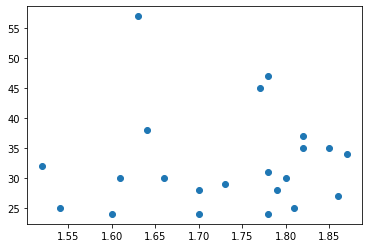

In [110]:
plt.scatter(x=lista_alturas, y=lista_edades)

In [111]:
seed = 0

In [112]:
lm = LinearRegression()

In [113]:
lista_edades = lista_edades.reshape(-1, 1)
lista_alturas = lista_alturas.reshape(-1, 1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(lista_alturas, lista_edades, test_size=0.2, random_state=seed)

In [115]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
array_cv = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f'Resultados de la validación cruzada: {array_cv.mean()} +- {array_cv.std()}')

Resultados de la validación cruzada: -7.584202975989174 +- 7.494212968028158


In [116]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
lm.score(X_test, y_test)

-0.4627934747224267

In [118]:
lm.fit(X=lista_alturas, y=lista_edades)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y = [27.47889182] + [2.90237467]x, -0.37847396908054165


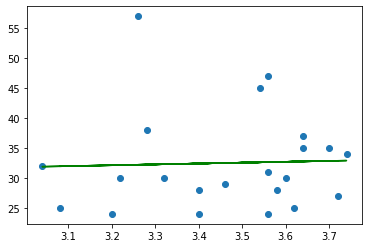

In [119]:
plt.scatter(x=lista_alturas * 2, y=lista_edades)
plt.plot(lista_alturas * 2, lm.predict(lista_alturas), c='green')
print(f'y = {lm.intercept_} + {lm.coef_[0]}x, {lm.score(lista_alturas * 2, lista_edades)}')

In [144]:
MAE = 0
for pos in range(len(lista_alturas)):
    error = abs(lm.predict(lista_alturas[pos].reshape(-1, 1)) - lista_edades[pos])
    MAE += error
    print(error)
MAE /= len(lista_alturas)
print(MAE[0])

[[4.59366755]]
[[2.18733509]]
[[3.29023747]]
[[16.24538259]]
[[9.34828496]]
[[11.75461741]]
[[13.89709763]]
[[4.30343008]]
[[0.21899736]]
[[8.47757256]]
[[24.76781003]]
[[8.82585752]]
[[17.29023747]]
[[49.58047493]]
[[7.]]
[[4.30343008]]
[[28.70976253]]
[[16.82585752]]
[[11.52242744]]
[[4.47757256]]
[[15.46437995]]
[[5.40633245]]
[12.20412569]


In [143]:
mean_absolute_error(lista_edades, lm.predict(lista_alturas))

12.204125689613818

In [145]:
MSE = 0
for pos, elemen in enumerate(lista_alturas):
    MSE += (lm.predict(elemen.reshape(-1, 1)) - lista_edades[pos]) ** 2
MSE /= len(lista_alturas)
print(MSE[0])
print((MSE**(1/2))[0])

[266.10626049]
[16.31276373]


In [146]:
mean_squared_error(lista_edades, lm.predict(lista_alturas))

266.10626049412326

In [124]:
df = pd.DataFrame([pd.Series(lista_alturas.flatten() ,name='Alturas'), pd.Series(lista_edades.flatten() ,name='Edades')])

In [125]:
df = df.T
df.index = lista_nombres

In [126]:
df

,Alturas,Edades
Clara Piniella,1.66,30.0
Daniel Walker,1.87,34.0
Leonardo Frazzetto,1.78,31.0
Xinru Yang,1.60,24.0
Jorge Garcia,1.79,28.0
Jonathan Suárez,1.86,27.0
Marina Serrano,1.54,25.0
Karina Inche,1.61,30.0
Mary Meza,1.52,32.0
Borja Puig,1.82,37.0


<AxesSubplot:>

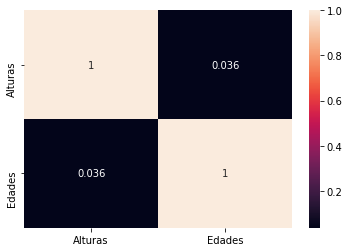

In [127]:
sns.heatmap(df.corr(), annot=True)

In [128]:
lista_alturas = lista_alturas * 2

In [129]:
array_cv = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f'Resultados de la validación cruzada: {array_cv.mean()} +- {array_cv.std()}')

Resultados de la validación cruzada: -7.584202975989174 +- 7.494212968028158


In [130]:
lm.fit(X=lista_alturas, y=lista_edades)
print(lm.coef_, lm.intercept_)

[[1.45118734]] [27.47889182]


Vemos que la pendiente se ha reducido a la mitad que la del caso inicial y que la secante permanece igual

In [131]:
lista_edades = lista_edades * 2

In [132]:
array_cv = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print(f'Resultados de la validación cruzada: {array_cv.mean()} +- {array_cv.std()}')

Resultados de la validación cruzada: -7.584202975989174 +- 7.494212968028158


In [133]:
lm.fit(X=lista_alturas, y=lista_edades)
print(lm.coef_, lm.intercept_)

[[2.90237467]] [54.95778364]


Parecia logico pensar que al doblar tanto la altura como la edad nos quedaria un recta igual que el caso inicial pero desplazada hacia arriba. Queda demostrado viendo que la pendiente permaece igual mientras que la secante es el doble que el del caso inicial